In [1]:
# from MMfunc import *
# Matrixes = generateSymetryBase()
# # somelist = listadous(Matrixes["4"]["001"],p)
# koordynaty = np.array([[0,0,0],[0,0,1],[0,1,0],[1,1,0],[1,0,0],[1,1,1],[1,0,1],[0,1,1],
#               [0.5,0.5,0],[0.5,0,0.5],[0,0.5,0.5],[0.5,0.5,1],[0.5,1,0.5],[1,0.5,0.5],
#              [0.75,0.25,0.25],[0.25,0.75,0.25],[0.25,0.25,0.75],[0.75,0.75,0.75]])
# komorka = supercell(koordynaty, size = 2)

In [42]:
import sympy as sp
#sp.init_printing(use_unicode=True)
x,y,z = sp.symbols("x y z")

import numpy as np
lines = [line.rstrip('\n') for line in open('ZnS-Sfaleryt.cif')]

P = 48
K = 144

SUBS = {x: 0,y:0,z:0}, {x: 0.25,y:0.25,z:0.25}
mojekoord = []
for SUB in SUBS:
    for line in lines[P:K]:
        koord = line.split(',')
        mojalista = []
        for i in range(3):
            expr = float(sp.sympify(line)[i].evalf(2,subs=SUB))
            mojalista.append(expr)
        mojekoord.append(mojalista)
cell = np.around(np.unique(mojekoord,axis = 0),4)
# print(cell)    

cell2 = cell.copy()
cell2[cell2<0] += 1
cell2 = np.unique(cell2,axis=0)
print(cell2)

[[0.   0.   0.  ]
 [0.   0.5  0.5 ]
 [0.25 0.25 0.25]
 [0.25 0.75 0.75]
 [0.5  0.   0.5 ]
 [0.5  0.5  0.  ]
 [0.75 0.25 0.75]
 [0.75 0.75 0.25]]


In [101]:
cellwith0 = cell2[~cell2.all(axis=1)]
print(cellwith0)

[[0.  0.  0. ]
 [0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]


In [100]:
import numpy as np
cellasd = np.array([[0,0,0],[0,0.5,0.5],[0.5,0,0.5],[0.5,0.5,0]])
print(cellasd)

[[0.  0.  0. ]
 [0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]


In [104]:
zera = np.argwhere(cellasd==0)
zera

array([[0, 0],
       [0, 1],
       [0, 2],
       [1, 0],
       [2, 1],
       [3, 2]], dtype=int64)

In [109]:
mylist_pom = []
for i in range(zera.shape[0]):
    print('i =',i)
    pomoc = cellasd[zera[i,0]].copy()
    pomoc[zera[i,1]] += 1
    mylist_pom.append(pomoc)
    war = np.argwhere(pomoc[zera[i,1]:]==0) + zera[i,1]
    print(pomoc)
    print("i war =",war)
    print("war.size = ",war.size)    
    print()
    if war.size:       
#             j=0
        for j in range(war.size):
            print('j =',j)
            pomoc = mylist_pom[-1].copy()
            pomoc[war[j]] += 1
            mylist_pom.append(pomoc)
            war = np.argwhere(pomoc[zera[i,1]:]==0) + zera[i,1]
            print(pomoc)
            print("j war =",war)
            print("war.size = ",war.size)
            print()
#             if war.size:        
#                     k=0
# #                 for k in range(war.size):
#                     print('k =',k)
#                     pomoc = mylist_pom[-1].copy()
#                     pomoc[war[k]] += 1
#                     mylist_pom.append(pomoc)
#                     war = np.argwhere(pomoc[zera[i,1]:]==0) +zera[i,1]
#                     print(pomoc)
#                     print("k war =",war)
#                     print("war.size = ",war.size)
#                     print()
    print()
        
mylist_pom = np.array(mylist_pom)
    #if war:
 #       pass
        #dodatek = func(pomoc,nr)
        
    
print(mylist_pom)

i = 0
[1. 0. 0.]
i war = [[1]
 [2]]
war.size =  2

j = 0
[1. 1. 0.]
j war = [[2]]
war.size =  1

j = 1


IndexError: index 1 is out of bounds for axis 0 with size 1

In [99]:
CELL = np.append(cell2,mylist_pom,axis=0)
CELL = np.unique(CELL,axis=0)
print(len(CELL))
print(CELL)

17
[[0.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.5  0.5 ]
 [0.   1.   0.  ]
 [0.   1.   1.  ]
 [0.25 0.25 0.25]
 [0.25 0.75 0.75]
 [0.5  0.   0.5 ]
 [0.5  0.5  0.  ]
 [0.5  0.5  1.  ]
 [0.5  1.   0.5 ]
 [0.75 0.25 0.75]
 [0.75 0.75 0.25]
 [1.   0.   0.  ]
 [1.   0.5  0.5 ]
 [1.   1.   0.  ]
 [1.   1.   1.  ]]


In [19]:
%timeit cellasd[zera[1][0],zera[1][1]]

816 ns ± 5.17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
718 ns ± 3.48 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [45]:
from itertools import product
for i in product(range(2),repeat=3):
    print(np.array(i))

[0 0 0]
[0 0 1]
[0 1 0]
[0 1 1]
[1 0 0]
[1 0 1]
[1 1 0]
[1 1 1]


In [16]:
def product2(*args, repeat=1):
    # product('ABCD', 'xy') --> Ax Ay Bx By Cx Cy Dx Dy
    # product(range(2), repeat=3) --> 000 001 010 011 100 101 110 111
    pools = [tuple(pool) for pool in args] * repeat
    print(pools)
    result = [[]]
    for pool in pools:
        result = [x+[y] for x in result for y in pool]
        print(result)
    return result
#     for prod in result:
#         yield tuple(prod)
# for i in product2(range(2),repeat=3):
#     print(np.array(i))
print(product2(range(2),repeat=3))

[(0, 1), (0, 1), (0, 1)]
[[0], [1]]
[[0, 0], [0, 1], [1, 0], [1, 1]]
[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]


In [30]:
def pointpoint(POINT,nr=0):
    mylist = []
    for nrwew in range(len(POINT[nr:])):
        if POINT[nr] == 0:
            
            POINTEQ = POINT.copy()[nr]+1
            mylist.append(POINTEQ)
            
            appender = pointpoint(POINT,nr+1)          
            if appender:
                mylist.append(appender)
                       
            appender2= pointpoint(POINTEQ,nr+1) 
            if appender2:
                mylist.append(appender2)
                       
    return mylist
pointpoint(cellwout0[0])

IndexError: invalid index to scalar variable.

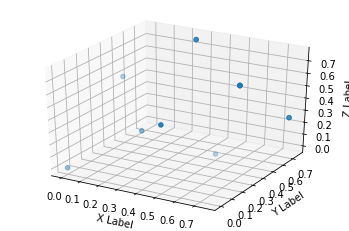

In [6]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for c, m in [('r', 'o'), ('b', '^')]:
mojalista2 = cell2.T
xs = mojalista2[0]
ys = mojalista2[1]
zs = mojalista2[2]
ax.scatter(xs, ys, zs)#, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()